In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
import sklearn
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


### Introduction to Regression with Neural Network in Tensorflow

There are many defenitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter...predicting a number

## Creating data to view and fit

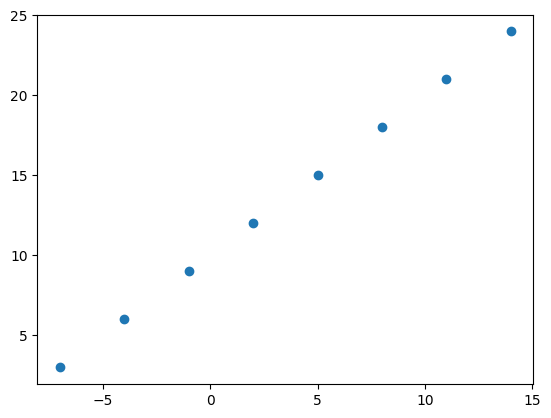

In [3]:
#Create features 
x=np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y=np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it

plt.scatter(x,y)


## input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction 

house_info=tf.constant(["bedroom","bathroom","garage"])
housse_price=tf.constant([939700])
house_info,housse_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [5]:
x[0],y[0]

(-7.0, 3.0)

In [6]:
x[1],y[1]

(-4.0, 6.0)

In [7]:
input_shape=x.shape
output_shape=y.shape
input_shape,output_shape

((8,), (8,))

In [8]:
# turn our numpy arrays to tensors

x=tf.cast(tf.constant(x), dtype=tf.float32)
y=tf.cast(tf.constant(y),dtype=tf.float32)

x,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [9]:
input_shape=x[0].shape
output_shape=y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with tensorflow

1. **Creating a model**- define the input and output layersm as well as the hidden layers of a deep learning model.

2. **Compiling a model**

3. **Fitting a model**- letting the model try to find patterns between x&y ( features and labels)

In [10]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API

model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

model.compile(loss=tf.keras.losses.mae,# mae = Mean absolute error
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
        ), 


# 3. Fit the model

model.fit(tf.expand_dims(x,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s 8ms/s

In [11]:
# # Check out x and y

# y_pred = model.predict([17.0])

# Improving the model

We can improve our model, by altering the steps we took to create model.

In [12]:
#rebuild model

# set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API

model=tf.keras.Sequential([
   
    tf.keras.layers.Dense(50, activation=None),
    
    
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

model.compile(loss=tf.keras.losses.mae,# mae = Mean absolute error
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
        ), 


# 3. Fit the model

model.fit(tf.expand_dims(x,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 505ms/step - loss: 13.1820 - accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 12.5071 - accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 11.8279 - accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 11.1425 - accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 10.4484 - accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 9.7426 - accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 9.0218 - accuracy: 0.0000e+00
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 8.2826 - accuracy: 0.0000e+00
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 7.5221 - accuracy: 0.0000e+00
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 6.7841 - acc

In [13]:
x,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [14]:
model.predict([100])

array([[110.56458]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building neural network is:

```
Build a model -> fit it  -> evaluate it -> tweak a model -> fit it -> evaluate -> tweak a model -> fit it -> evaluate it...

```

When it comes to evaluating... there are 3 words you should memorize 

>"Visualize, Visualize, Visualize"

In [15]:
# Make a bigger dataset

X=tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [16]:
# Make the labels for the dataset

y=X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

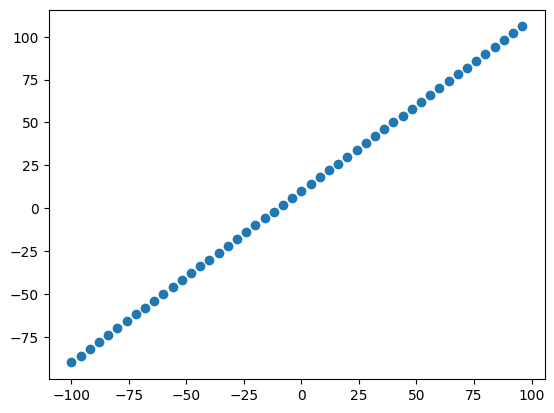

In [17]:
# Visualize the data
plt.scatter(X,y)


### The 3 sets...

* Training set - the model learns from this data, which is typacilly 70-80% of the total data you have available.
* Validation set - the model gets tuned on this data, which is typacilly 10-15% of the data avilable.
* Test set - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [18]:
# Splitting dataset 

X_train= X[:40]
X_test=X[40:]
y_train=y[:40]
y_test=y[40:]

len(X_train),len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

### visualizing the data

Now we've got our data in training and test sets... let's visualize the data

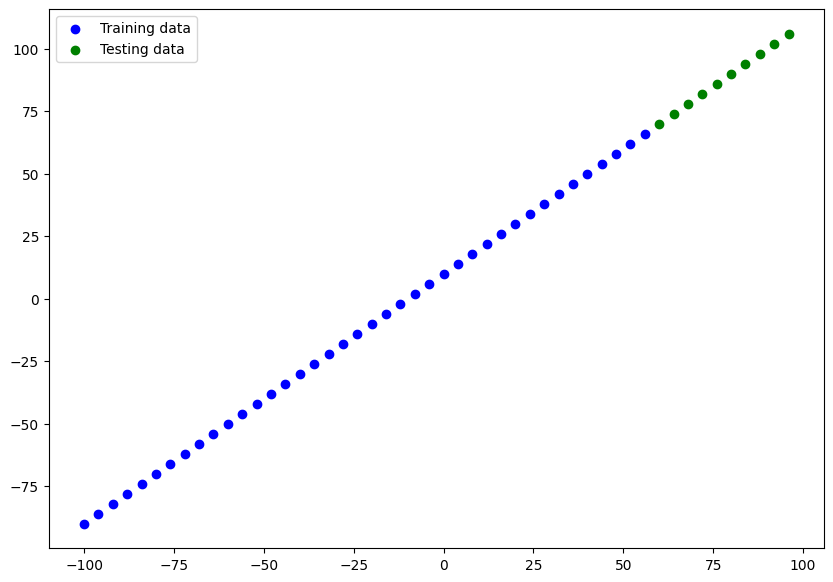

In [19]:
plt.figure(figsize=(10,7))
# plot training in blue
plt.scatter(X_train,y_train,c="b",label="Training data")
# plot test data in green
plt.scatter(X_test,y_test,c="g",label="Testing data")
# Show a legend
plt.legend()


In [20]:
# Let's have a look at how to build a neural network for our data

# 1. Create a  model
model=tf.keras.Sequential([    
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

model.compile(loss=tf.keras.losses.mae,  # mae = Mean absolute error
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
        ), 


(None,)

### Visualizing the model

In [21]:
# model.summary()

In [22]:
# Let's Create a model which builds atuomatically by defining the input_shape argument

tf.random.set_seed(42)

# Create a model (same as above)

model=tf.keras.Sequential([    
    tf.keras.layers.Dense(15,input_shape=[1],name="input_layer"),
    tf.keras.layers.Dense(1,name="output_layer")
],name="model_1")

# 2. Compile the model

model.compile(loss=tf.keras.losses.mae,  # mae = Mean absolute error
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=["mae"]
        ), 

(None,)

In [23]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 15)                30        
                                                                 
 output_layer (Dense)        (None, 1)                 16        
                                                                 
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model update as it trains
* Non-trainable params - these parameters aren't updated during training(this is typical when you bring in already learn patterns or parameters from other models during **transfer learning** ).

In [24]:
# Let's fit our model to the training
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 17.0150 - mae: 17.0150
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 17.6778 - mae: 17.6778
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 17.1874 - mae: 17.1874
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 17.9152 - mae: 17.9152
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 7.1724 - mae: 7.1724
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 12.4098 - mae: 12.4098
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 7.5898 - mae: 7.5898
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 9.0963 - mae: 9.0963
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 5.8359 - mae: 5.8359
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 7.5949 - mae: 7.5949
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - l

In [25]:
from tensorflow.keras.utils import plot_model

plot_model(model=model,show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


## Visualizing our models predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels

In [26]:
y_pred=model.predict(X_test)
y_pred

array([[ 70.27891 ],
       [ 74.2841  ],
       [ 78.2893  ],
       [ 82.29448 ],
       [ 86.299675],
       [ 90.30487 ],
       [ 94.31006 ],
       [ 98.31526 ],
       [102.32045 ],
       [106.325645]], dtype=float32)

In [27]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

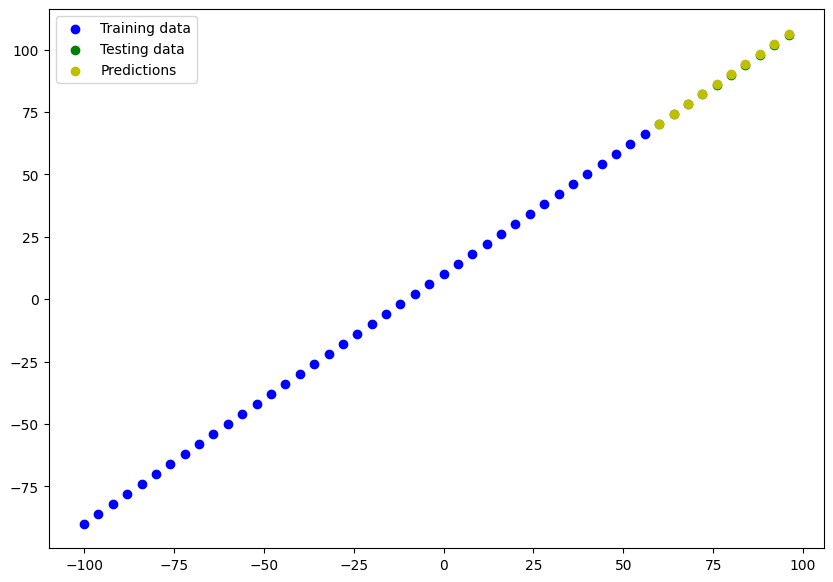

In [28]:
# Lets's create a plotting function 
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
    plt.figure(figsize=(10,7))
    # Plot training data in blue
    plt.scatter(train_data,train_labels,c="b",label="Training data")
    # Plot testing data in green
    plt.scatter(test_data,test_labels,c="g",label="Testing data")
    # Plot model's prediction in yellow
    plt.scatter(test_data,predictions,c="y",label="Predictions")
    # Show legend
    plt.legend()
    
    
plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=y_pred)    

### Evaluating our model's predictions with regression evaluation metrics

In [29]:
# Evaluate the model on the test

model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 165ms/step - loss: 0.3023 - mae: 0.3023


[0.3022750914096832, 0.3022750914096832]

In [30]:
# Calculate the mean absolute error 

mae=tf.metrics.MAE(y_test,tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.3022751>

In [31]:
# Calculate mean square error 

mse= tf.metrics.MSE(y_test,tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.09159269>

In [32]:
def mae(y_test,y_pred):
    return tf.metrics.MAE(y_test,tf.squeeze(y_pred))

def mse(y_test,y_pred):
    return tf.metrics.MSE(y_test,tf.squeeze(y_pred))

In [33]:
mae=mae(y_test=y_test,y_pred=y_pred)
mse=mse(y_test=y_test,y_pred=y_pred)
mae,mse

(<tf.Tensor: shape=(), dtype=float32, numpy=0.3022751>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.09159269>)

### Saving our model

There are two formats to save the model :
1. The SavedModel format
2. The HDF5 format 

In [34]:
# Save model
model.save("most_accurate_model")

INFO:tensorflow:Assets written to: most_accurate_model\assets


In [35]:
# Save in HDF5 format
model.save("most_accurate_model.h5")

### Loading saved Model


In [36]:
# Load model

loaded_SavedModel_format=tf.keras.models.load_model("most_accurate_model")
loaded_SavedModel_format.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 15)                30        
                                                                 
 output_layer (Dense)        (None, 1)                 16        
                                                                 
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________


In [37]:
loaded_model_preds=loaded_SavedModel_format.predict(X_test)
model_pred=model.predict(X_test)
loaded_model_preds == model_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [38]:
# Load model in h5 format

loaded_h5_model=tf.keras.models.load_model("most_accurate_model.h5")


In [39]:
loaded_h5_modeld_model=loaded_h5_model.predict(X_test)
model_pred=model.predict(X_test)
loaded_model_preds == model_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## A larger example

In [40]:
insurance_dataset=pd.read_csv('/tensorflow_coursse/insurance.csv')
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [41]:
# Determine the size of data
insurance_dataset.count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [42]:
# Checking for null values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [43]:
# Descriptive statistics for the numeric columns
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [44]:
# # Converting string columns to oune hot encoding
# insurance_data_numeric = pd.get_dummies(insurance_dataset, columns=['sex','smoker','region'])
# insurance_data_numeric.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [70]:
# Determining features and labels

X=insurance_dataset.drop("charges",axis=1)
y=insurance_dataset['charges']
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [71]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)
print(len(y_transformed))

# split data
  

X_train, X_test, y_train ,y_test= train_test_split(X,y,test_size=0.2,random_state=42)


1338


In [72]:
X_train.shape

(1070, 6)

In [73]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

# Create column transformer 

ct=make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),# turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
) 

# fit the column transformer to our training data
ct.fit(X_train)

# transform training and test data with normalization

X_train_normal = ct.transform(X_train)
X_test_normal=ct.transform(X_test)

In [74]:
X_train_normal.shape,X_train.shape

((1070, 11), (1070, 6))

In [85]:
# Let's Create a model which builds atuomatically by defining the input_shape argument

tf.random.set_seed(42)

# Create a model (same as above)

insurance_model=tf.keras.Sequential([    
   
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(1,name="output_layer")
],name="model_1")

# 2. Compile the model

insurance_model.compile(loss=tf.keras.losses.mae,  # mae = Mean absolute error
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
        ), 

callback=tf.keras.callbacks.EarlyStopping(monitor='mae',verbose=1,)

In [86]:
history= insurance_model.fit(X_train_normal,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 8ms/step - loss: 11125.5820 - mae: 11125.5820
Epoch 2/100
34/34 [==============================] - 0s 6ms/step - loss: 7220.3560 - mae: 7220.3560
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 4422.0547 - mae: 4422.0547
Epoch 4/100
34/34 [==============================] - 0s 6ms/step - loss: 3731.4688 - mae: 3731.4688
Epoch 5/100
34/34 [==============================] - 0s 6ms/step - loss: 3582.7078 - mae: 3582.7078
Epoch 6/100
34/34 [==============================] - 0s 7ms/step - loss: 3687.3674 - mae: 3687.3674
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 3623.7095 - mae: 3623.7095
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 3639.8638 - mae: 3639.8638
Epoch 9/100
34/34 [==============================] - 0s 6ms/step - loss: 3550.2832 - mae: 3550.2832
Epoch 10/100
34/34 [==============================] - 0s 9ms/step - loss: 3605.8389 - mae: 3605.83

In [87]:
insurance_model.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 5ms/step - loss: 3189.3547 - mae: 3189.3547


[3189.354736328125, 3189.354736328125]

Text(0.5, 0, 'epochs')

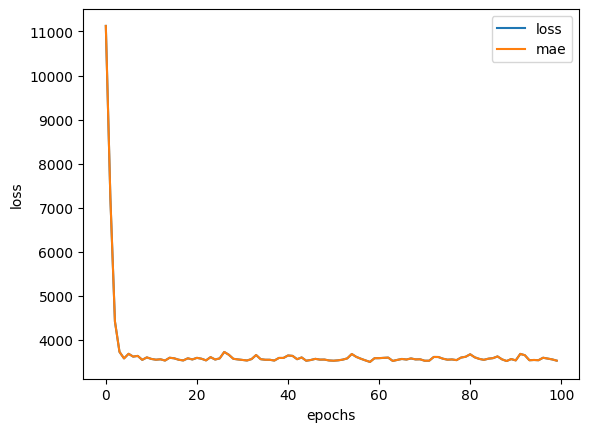

In [88]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [113]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression(fit_intercept=True)

lr_model.fit(X_train_normal,
             y_train)

LinearRegression()

In [100]:
y_test.shape

(268,)

In [97]:
#predictions with test data
y_pred = lr_model.predict(X_test_normal)
print("pred :",y_pred,"actual :",y_test)

pred : [ 9088.  7168. 36672.  9472. 26624. 10752.   384. 16832.  1344. 11200.
 27776.  9408.  5376. 37888. 39808. 36672. 15168. 35520.  9216. 31232.
  3904. 10112.  2368.  7168. 11392. 13120. 14592.  6272. 10112.  2176.
  9152. 13184.  4608.  3584.  4480. 12992.  2176.  8896. 33088. 32192.
  3968.  4352. 14208. 11520.  8704. 12160.  5376.  3328. 35072.  9088.
 15872.  2368. 12416.  1536. 13376. 12608.  4480. 31744. 13440. 13056.
 14272. 10432. 16320.  7872. 11968.  4224. 26304. 11008.  2368.  6144.
 10688. 11712. 11072.  9152. 11840.  6848.  7232. 10944.  6592.  8896.
  3712. 36352.  6464. 30528. 34304. 34944.  6976. 12864.  9984. 14464.
 17728. 35072. 32768.  6272. 31552.  9472. 29056.  3712. 28096.  5952.
  5568.  1984. 11456. 14976. 11776.  4288.  9920. 31424.     0. 32640.
  3264. 10048. 14400. 31296. 11584.  3904. 13184. 31552.  8192.  3264.
  8576. 10560. 15296.  5632.  3904. 10304. 10944. 11136. 14528.  7296.
  5440.  9152.  9344. 12544.  8384. 15296.  8448. 31488. 35456. 31360.

In [112]:
from sklearn import svm

#  Applying SVM algorithm
SVM_model=svm.SVC(C=3.0,kernel='rbf')

# Train the algorithm
SVM_model.fit(X_train_normal,y_train)

ValueError: Unknown label type: 'continuous'

In [56]:
# Make prediction by test data
y_pred=model.predict(X_test)

    # Get model accuracy
y_pred[0],y_test[0]

ValueError: in user code:

    File "c:\anaconda3\envs\tf2.4\lib\site-packages\keras\engine\training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "c:\anaconda3\envs\tf2.4\lib\site-packages\keras\engine\training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\anaconda3\envs\tf2.4\lib\site-packages\keras\engine\training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "c:\anaconda3\envs\tf2.4\lib\site-packages\keras\engine\training.py", line 1751, in predict_step
        return self(x, training=False)
    File "c:\anaconda3\envs\tf2.4\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\anaconda3\envs\tf2.4\lib\site-packages\keras\engine\input_spec.py", line 248, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "model_1" (type Sequential).
    
    Input 0 of layer "input_layer" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (None, 11)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, 11), dtype=float32)
      • training=False
      • mask=None


In [109]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

In [110]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_normal, y_train)
  
# making predictions on the testing set
y_pred = gnb.predict(X_test_normal)

y_pred[0],y_test


ValueError: Unknown label type: (array([ 1121.8739 ,  1135.9407 ,  1136.3994 , ..., 58571.07448,
       60021.39897, 62592.87309]),)